<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/didactica_ciencia_datos/blob/main/referentes/geron/part_1/c_1/c_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>


# [Cuaderno de Geron del capítulo 3 en Github](https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb)

# Chapter 3 – Classification

Este cuaderno contiene todo el código de ejemplo y las soluciones a los ejercicios del capítulo 3.

## Configuración

Este proyecto requiere Python 3.7 o superior:

In [1]:
import sys 
assert sys.version_info >= (3,7)

También requiere Scikit-Learn ≥ 1.0.1:

In [2]:
import sklearn 
assert sklearn.__version__ >= '1.0.1'

Al igual que en el capítulo anterior, definamos los tamaños de fuente predeterminados para hacer las figuras más bonitas:

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

Y creemos la carpeta de imágenes/clasificación (`images/classification`) (si aún no existe), y definamos la función `save_fig()` que se usa a través de este cuaderno para guardar las figuras en alta resolución para el libro:

In [8]:
from pathlib import Path 
IMAGES_PATH = Path()

IMAGES_PATH.mkdir(parents = True, exist_ok = True) 

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# MNIST 

In [10]:
%%time 
from sklearn.datasets import fetch_openml 

mnist = fetch_openml(name = 'mnist_784', as_frame = False) 

In [12]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

**Autor**: Yann LeCun, Corinna Cortés, Christopher J.C. Burges
**Fuente**: [Sitio web de MNIST](http://yann.lecun.com/exdb/mnist/) - Fecha desconocida
**Por favor cite**:

La base de datos MNIST de dígitos escritos a mano con 784 características, datos sin procesar disponibles en: http://yann.lecun.com/exdb/mnist/. Se puede dividir en un conjunto de entrenamiento de los primeros 60 000 ejemplos y un conjunto de prueba de 10 000 ejemplos.

Es un subconjunto de un conjunto más grande disponible en NIST. Los dígitos se normalizaron en tamaño y se centraron en una imagen de tamaño fijo. Es una buena base de datos para las personas que desean probar técnicas de aprendizaje y métodos de reconocimiento de patrones en datos del mundo real mientras dedican un esfuerzo mínimo al preprocesamiento y formateo. Las imágenes originales en blanco y negro (dos niveles) del NIST se normalizaron en tamaño para que cupieran en un cuadro de 20 x 20 píxeles conservando su relación de aspecto. Las imágenes resultantes contienen niveles de gris como resultado de la técnica de suavizado utilizada por el algoritmo de normalización. las imágenes se centraron en una imagen de 28x28 calculando el centro de masa de los píxeles y traduciendo la imagen para posicionar este punto en el centro del campo de 28x28.

Con algunos métodos de clasificación (particularmente métodos basados en plantillas, como SVM y K-vecinos más cercanos), la tasa de error mejora cuando los dígitos están centrados por el cuadro delimitador en lugar del centro de masa. Si realiza este tipo de procesamiento previo, debe informarlo en sus publicaciones. La base de datos MNIST se construyó a partir del NIST del NIST que originalmente designó al SD-3 como su conjunto de entrenamiento y al SD-1 como su conjunto de prueba. Sin embargo, SD-3 es mucho más limpio y fácil de reconocer que SD-1. La razón de esto se puede encontrar en el hecho de que el SD-3 se recopiló entre los empleados de la Oficina del Censo, mientras que el SD-1 se recopiló entre los estudiantes de secundaria. Sacar conclusiones sensatas de los experimentos de aprendizaje requiere que el resultado sea independiente de la elección del conjunto de entrenamiento y la prueba entre el conjunto completo de muestras. Por lo tanto, fue necesario construir una nueva base de datos mezclando los conjuntos de datos del NIST.

El conjunto de entrenamiento MNIST se compone de 30 000 patrones de SD-3 y 30 000 patrones de SD-1. Nuestro conjunto de prueba estaba compuesto por 5000 patrones de SD-3 y 5000 patrones de SD-1. El conjunto de entrenamiento de 60.000 patrones contenía ejemplos de aproximadamente 250 escritores. Nos aseguramos de que los conjuntos de escritores del conjunto de entrenamiento y el conjunto de prueba fueran disjuntos. SD-1 contiene imágenes de 58.527 dígitos escritas por 500 escritores diferentes. En contraste con SD-3, donde los bloques de datos de cada escritor aparecieron en secuencia, los datos en SD-1 están codificados. Las identidades de los escritores para SD-1 están disponibles y usamos esta información para descifrar los escritores. 

Luego dividimos SD-1 en dos: los personajes escritos por los primeros 250 escritores entraron en nuestro nuevo conjunto de entrenamiento. Los 250 escritores restantes se colocaron en nuestro conjunto de prueba. Así teníamos dos conjuntos con casi 30.000 ejemplos cada uno. El nuevo conjunto de entrenamiento se completó con suficientes ejemplos de SD-3, comenzando en el patrón n.° 0, para hacer un conjunto completo de 60 000 patrones de entrenamiento. De manera similar, el nuevo conjunto de prueba se completó con ejemplos SD-3 a partir del patrón n.° 35 000 para formar un conjunto completo con 60 000 patrones de prueba. Solo un subconjunto de 10 000 imágenes de prueba (5000 de SD-1 y 5000 de SD-3) está disponible en este sitio. El conjunto completo de entrenamiento de 60.000 muestras está disponible.

Descargado de openml.org.

In [13]:
mnist.keys() 

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [14]:
X,y = mnist.data, mnist.target 

In [15]:
X.shape 

(70000, 784)

In [16]:
y 

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [17]:
y.shape 

(70000,)

In [18]:
28**2

784

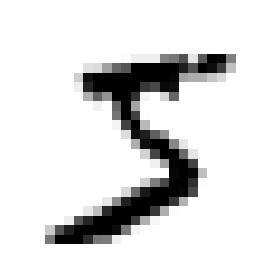

In [20]:
import matplotlib.pyplot as plt 

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap = 'binary')
    plt.axis('off')
    
some_digit = X[0] 
plot_digit(some_digit)
save_fig('some_digit_plot')
plt.show() 

In [21]:
y[0]

'5'

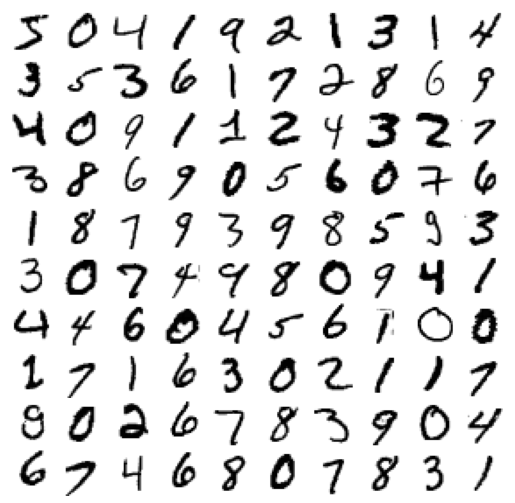

In [23]:
plt.figure(figsize = (9,9))

for idx, image_data in enumerate(X[:100]):
    plt.subplot(10,10, idx + 1)
    plot_digit(image_data)

plt.subplots_adjust(wspace = 0, hspace = 0)
save_fig('more_digit_plots', tight_layout = False) 
plt.show() 


In [24]:
X_train, X_test, y_train, y_test = X[:60_000], X[60_000:], y[:60_000], y[60_000:] 

# Training a Binary Classifier

In [25]:
y_train_5 = (y_train == '5') 
y_test_5 = (y_test == '5')

In [27]:
%%time
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5) 

SGDClassifier(random_state=42)

In [28]:
sgd_clf.predict([some_digit])

array([ True])

# Performance Measures
## Measuring Accuracy Using Cross-Validation

In [29]:
%%time 
from sklearn.model_selection import cross_val_score 

cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy') 

CPU times: total: 39.1 s
Wall time: 38.1 s


array([0.95035, 0.96035, 0.9604 ])

## Referentes

* capítulo 3 de Geron en GitHub: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb

* Módulo pathlib para manipular rutas de archivos en Python 3: https://www.digitalocean.com/community/tutorials/how-to-use-the-pathlib-module-to-manipulate-filesystem-paths-in-python-3-es

* OpenML Un laboratorio mundial de aprendizaje automático: https://www.openml.org/